### Assignment 2

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.
В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).

    1. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей работает хуже, чем логистическая регрессия.

    2. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

    3. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.

    4. Сгенерировать датасет для задачи регрессии (MSE), на котором решающее дерево работает хуже, чем линейная регрессия.

In [636]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import make_classification, make_circles, make_blobs
from sklearn.metrics import accuracy_score, roc_auc_score

%matplotlib inline

In [550]:
def get_scores(clf, X_test, X_train, y_test, y_train, score):
    if score == 'accuracy':
        a= 'Not cross_val: ' + str(accuracy_score(y_test, clf.predict(X_test)))
    if score == 'roc_auc':
        a = 'Not cross_val: ' + str(roc_auc_score(y_test, clf.predict(X_test)))
    b = 'Train cross_val: ' + str(np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring=score, n_jobs=-1)))
    c = 'Test cross_val: ' + str(np.mean(cross_val_score(clf, X_test, y_test, cv=5, scoring=score, n_jobs=-1)))
    return a, b, c

** Метод ближайших соседей работает хуже, чем логистическая регрессия.**

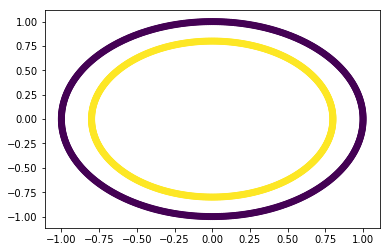

In [543]:
X, y = make_circles(n_samples=1000, random_state=139)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [544]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

clf_knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
clf_logreg = LogisticRegression(random_state=139)

('Not cross_val: 1.0', 'Train cross_val: 1.0', 'Test cross_val: 0.966666666667')


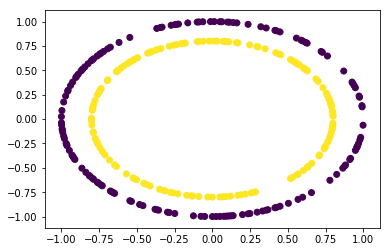

In [546]:
clf_knn.fit(X_train, y_train)
print(get_scores(clf_knn, X_test, X_train, y_test, y_train, 'accuracy'))
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf_knn.predict(X_test))

('Not cross_val: 0.433333333333', 'Train cross_val: 0.512857142857', 'Test cross_val: 0.56')


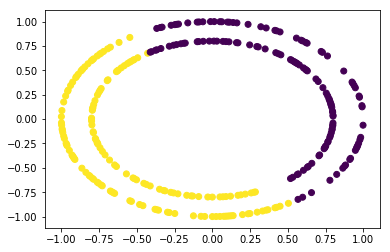

In [547]:
clf_logreg.fit(X_train, y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf_logreg.predict(X_test))
print(get_scores(clf_logreg, X_test, X_train, y_test, y_train, 'accuracy'))

При таком построении данных логистическая регрессия всегда будет предсказывать с вероятность ~50%. Так как "рисунок" данных симметричен, но лр будет делить его пополам, тем самым всегда относя половину объектов к неправильному типу.

**Метод ближайших соседей работает хуже, чем логистическая регрессия.**

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


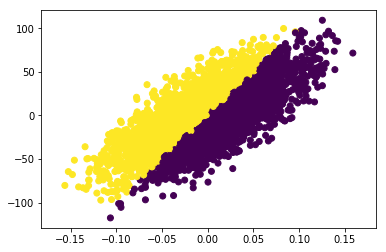

In [548]:
mean = [0, 0]
cov = [[1, 1000], [0, 1]] 
X = np.random.multivariate_normal(mean, cov, 5000)

y = []
for x in X:
    if (1000*x[0] > x[1]):
        y.append(0)
    else:
        y.append(1)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
clf_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
clf_logreg = LogisticRegression(random_state=139)

('Not cross_val: 0.591856330014', 'Train cross_val: 0.579285947712', 'Test cross_val: 0.481356685633')


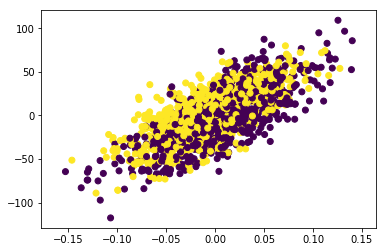

In [551]:
clf_knn.fit(X_train, y_train)
print(get_scores(clf_knn, X_test, X_train, y_test, y_train, 'roc_auc'))
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf_knn.predict(X_test))

('Not cross_val: 0.973648648649', 'Train cross_val: 0.999642156863', 'Test cross_val: 0.997661806543')


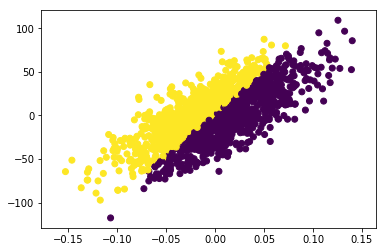

In [552]:
clf_logreg.fit(X_train, y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf_logreg.predict(X_test))
print(get_scores(clf_logreg, X_test, X_train, y_test, y_train, 'roc_auc'))

На таком датасете объекты разных классов "разделены" ровной линией, поэтому качество предсказаний регрессии близко к 1. Однако для метода соседей такой датасет не подходит, так как для большого количества объектов расстояние до объектов другого класса меньше, чем до объектов своего.

**Метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.**

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


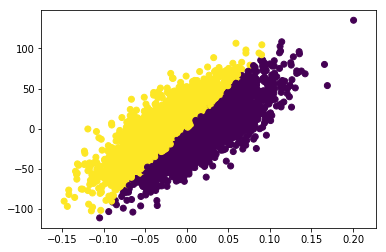

In [579]:
mean = [0, 0]
cov = [[1, 1000], [0, 1]] 
X = np.random.multivariate_normal(mean, cov, 5000)

y = []
for x in X:
    if (1000*x[0] > x[1]):
        y.append(0)
    else:
        y.append(1)

plt.scatter(X[:, 0], X[:, 1], c=y)        

In [581]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
clf_knn_euc = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
clf_knn_cos = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, metric='cosine')

('Not cross_val: 0.606', 'Train cross_val: 0.594189936764', 'Test cross_val: 0.514044444444')


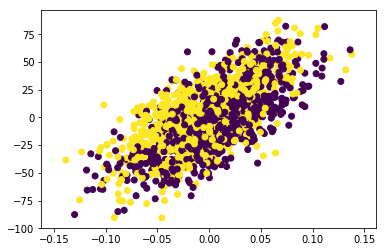

In [556]:
clf_knn_euc.fit(X_train, y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf_knn_euc.predict(X_test))
print(get_scores(clf_knn_euc, X_test, X_train, y_test, y_train, 'roc_auc'))

('Not cross_val: 1.0', 'Train cross_val: 1.0', 'Test cross_val: 1.0')


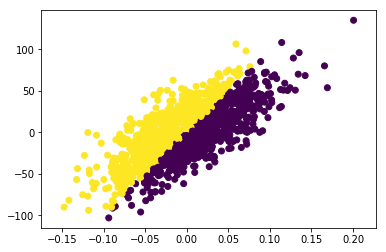

In [582]:
clf_knn_cos.fit(X_train, y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf_knn_cos.predict(X_test))
print(get_scores(clf_knn_cos, X_test, X_train, y_test, y_train, 'roc_auc'))

Как и в предыдущем случае, метод соседей на таком датасете работает плохо из-за маленького расстояния между объектами разных классов.

**Решающее дерево работает хуже, чем линейная регрессия.**